In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

## train 데이터 불러오기

In [2]:
import pandas as pd

train = pd.read_csv('train.csv')

## 데이터 살펴보기

In [30]:
train.head(5)

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,...,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,0,175499.0,-13899,11003.0,1,0,0,0,0.0,-6.0,...,1,0,0,0,0,0,1,0,0,0
1,1,220499.0,-11380,14172.0,1,0,0,1,1.0,-5.0,...,0,0,0,0,0,1,0,0,0,0
3,3,175499.0,-15088,13620.0,1,0,1,0,0.0,-37.0,...,1,0,0,0,0,1,0,0,0,0
4,4,130499.0,-15037,13607.0,1,0,0,0,0.0,-26.0,...,1,0,0,0,0,1,0,0,0,0
5,5,242999.0,-13413,10716.0,1,0,0,1,2.0,-18.0,...,1,0,0,0,0,1,0,0,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

occyp_type(직업종류) feature에 결측치가 많은 것을 알 수있다. 자세히 살펴보자

In [6]:
train[train['occyp_type'].isnull()]['credit'].value_counts()

2.0    5266
1.0    1938
0.0     967
Name: credit, dtype: int64

In [7]:
train['credit'].value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

train 데이터의 credit 비율과 occyp_type 가 NaN인 비율이 비슷하므로 occyp_type 에 임의의값 inoccupation으로 채워 줄 까 고민하였는데,

각 데이터 별로 `DAYS_EMPLOYED` 값을 살펴 보았을 때 일은 하고 있는 사람도 다수 있었기 때문에 결측치를 임의의 값으로 채우기 보다는 drop 해주었다.

In [8]:
train.drop(columns = 'occyp_type', inplace=True)

In [9]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,2.0,-26.0,2.0


## 변수별 상관도를 확인하여 상관도가 높은 변수를 drop 하자.

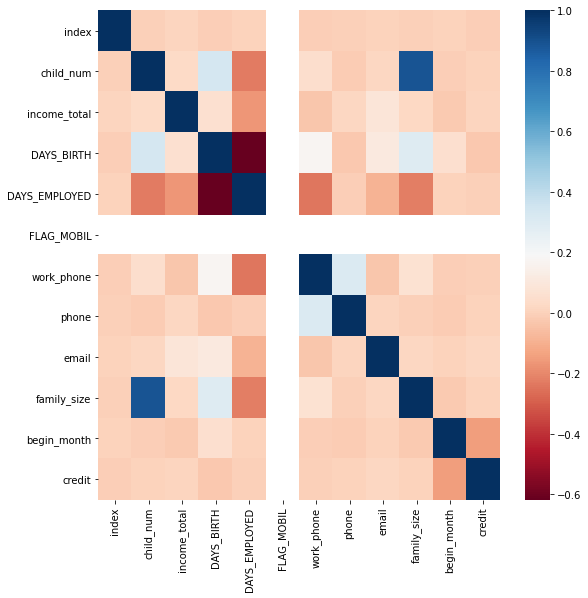

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(9,9))
corr = train.corr()
sns.heatmap(corr,cmap='RdBu')

child_num 과 family_size는 상관도가 매우 높기때문에 둘중 한개의 변수를 drop 하자.  
저는 `child_num` 변수를 drop 해 주었습니다.

In [11]:
train = train.drop('child_num', axis=1)

In [12]:
train.head()

,index,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,F,N,N,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,1,F,N,Y,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,2,M,Y,Y,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,2.0,-22.0,2.0
3,3,F,N,Y,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,2.0,-37.0,0.0
4,4,F,Y,Y,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,2.0,-26.0,2.0


## 수치데이터의 특성을 살펴보자.


In [13]:
columns = ['income_total','DAYS_BIRTH','DAYS_EMPLOYED','family_size','begin_month']
train[columns].describe()

,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month
count,2.645700e+04,26457.000000,26457.000000,26457.000000,26457.000000
mean,1.873065e+05,-15958.053899,59068.750728,2.196848,-26.123294
std,1.018784e+05,4201.589022,137475.427503,0.916717,16.559550
min,2.700000e+04,-25152.000000,-15713.000000,1.000000,-60.000000
25%,1.215000e+05,-19431.000000,-3153.000000,2.000000,-39.000000
50%,1.575000e+05,-15547.000000,-1539.000000,2.000000,-24.000000
75%,2.250000e+05,-12446.000000,-407.000000,3.000000,-12.000000
max,1.575000e+06,-7705.000000,365243.000000,20.000000,0.000000


## 한눈에 알아보기어렵기때문에 그래프로 시각화

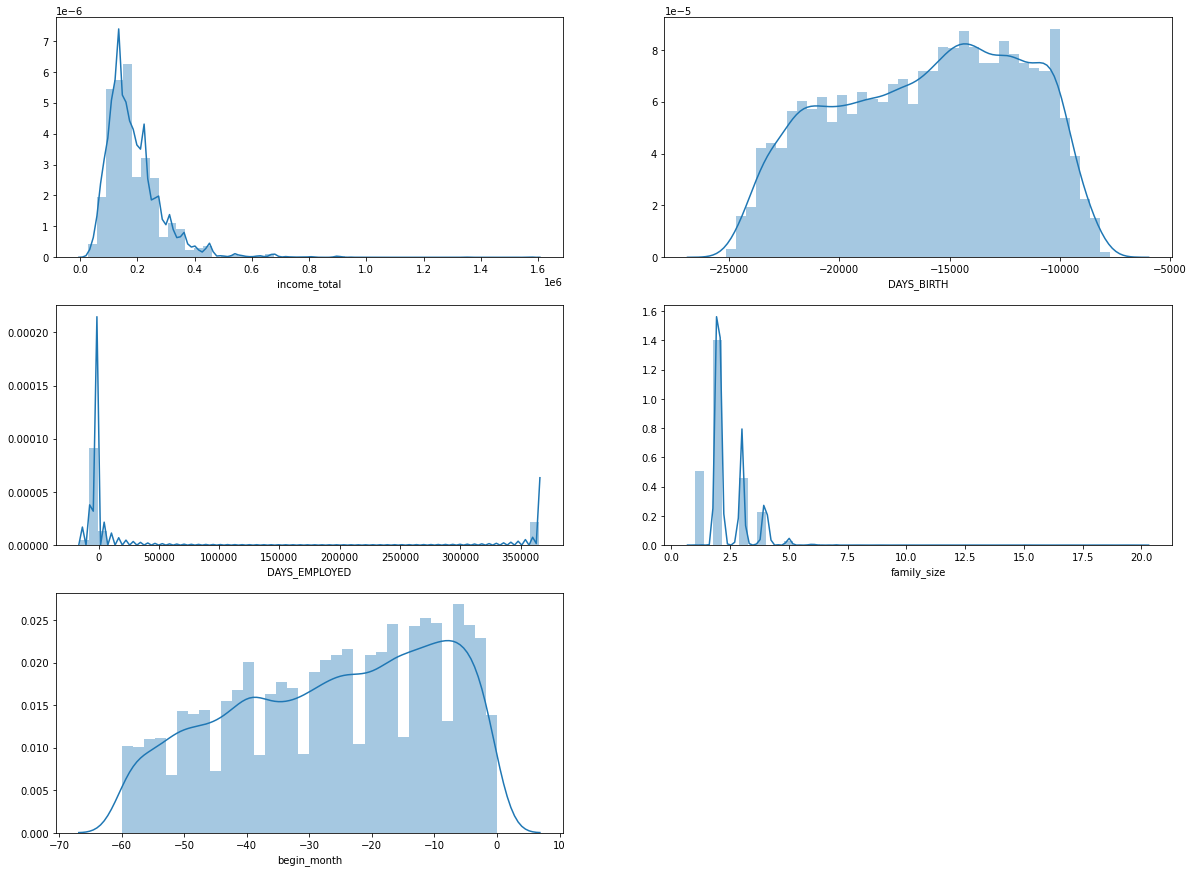

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,15))
for i in range(5):
    plt.subplot(3,2,i+1)
    sns.distplot(train[columns[i]])
plt.show()

수치 데이터를 살펴 보았을때,  `income_total`, `DAYS`,`EMPLOYED`, `family_size` 등은 데이터가 skew 돼있기 때문에 정규화 시켜준다.
*로그 변환을 하지 않은 이유는 음수(-) 값이 있기때문에 적용하지 않았다.*

In [15]:
import numpy as np

candidate = ['income_total', 'DAYS_EMPLOYED', 'family_size']
for cand in candidate :
    train[cand] = ((train[cand] - min(train[cand]) / min(train[cand]) - min(train[cand])))

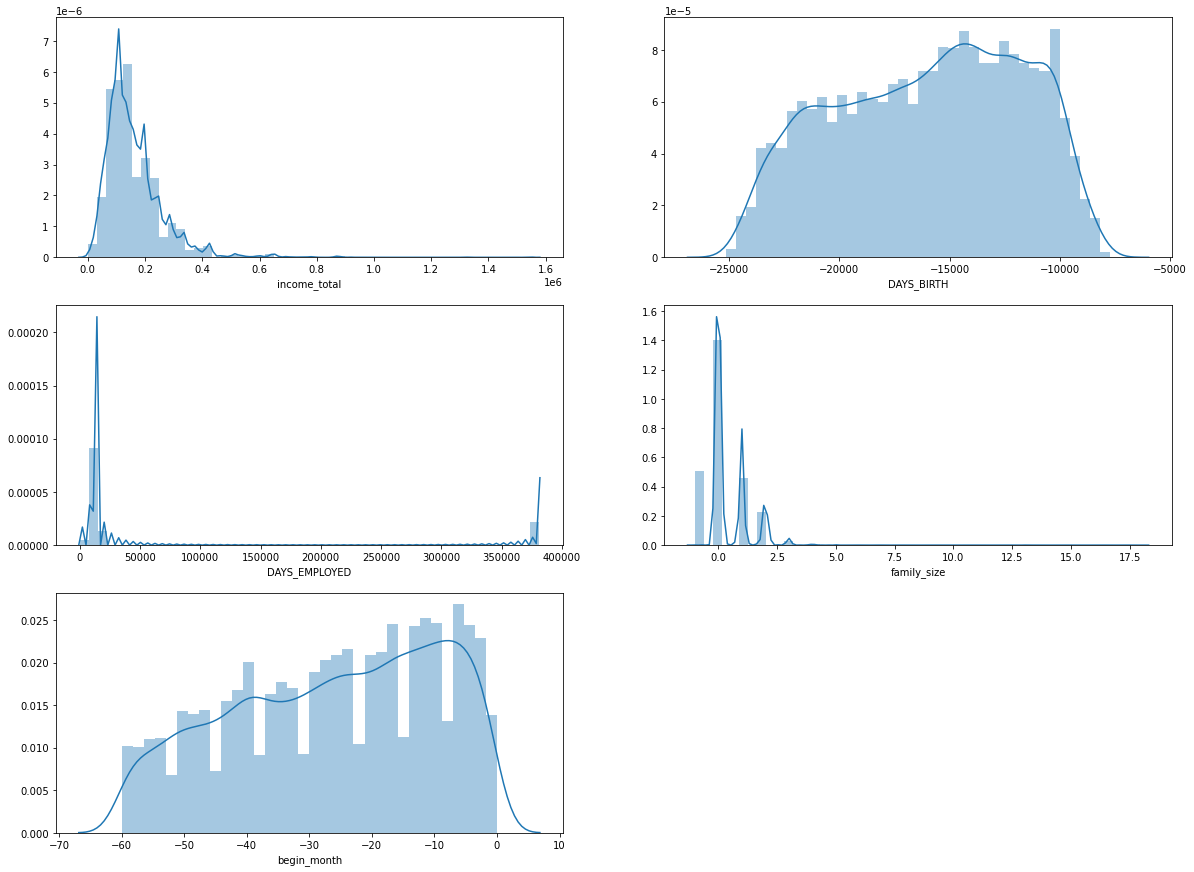

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,15))
for i in range(5):
    plt.subplot(3,2,i+1)
    sns.distplot(train[columns[i]])
plt.show()

## 이상치 제거 

numpy의 percentile 을 이용하여 1분위수와 3분위 수를 구하고  그에 따른 outlier를 구한다.

In [29]:
def remove_outlier(train,column):
    df = train[column]
    # 1분위수
    quan_25 = np.percentile(df.values, 25)
    
    # 3분위수
    quan_75 = np.percentile(df.values, 75)
    
    iqr = quan_75 - quan_25
    
    lowest = quan_25 - iqr * 1.5
    highest = quan_75 + iqr * 1.5
    outlier_index = df[(df < lowest) | (df > highest)].index
    print('outlier의 수 : ' , len(outlier_index))
    train.drop(outlier_index, axis = 0, inplace = True)
    
    return train


for cand in candidate:  
    train = remove_outlier(train,cand)
    
len(train)

outlier의 수 :  1129
outlier의 수 :  5654
outlier의 수 :  301


19373

이상치라고 해서 무조건 제거하는것은 옳은 방법이 아닙니다. credit별 피처 별로 이사잋를 제거 해보며 최적의 성능을 낼 수 있는 제거 방법을 찾아보는 것을 추천 드립니다! 